# NLP Basic 실습

In [8]:
import numpy as np
import pandas as pd
# !pip3 install KoNLPy

In [7]:
from konlpy.tag import *

In [9]:
twitter = Okt()  #twitter class 객체당!
komoran = Komoran()
kkma = Kkma()
# mecab = Mecab()
# hannanum = Hannanum()

In [10]:
text = "이별을 말한 내가 이 정도인데 그대는 지금 얼마나 아플지"

## 명사 추출

In [11]:
#twitter(Okt)
twitter.nouns(text)

['이별', '말', '내', '이', '정도', '그대', '지금', '얼마나']

In [12]:
#komoran
komoran.nouns(text)

['이별', '말', '정도']

In [13]:
#kkma
kkma.nouns(text) #시간 제일 오래 걸림

['이별', '내가', '정도', '그대']

## 형태소 추출

In [14]:
#twitter(Okt)
twitter.morphs(text)

['이별', '을', '말', '한', '내', '가', '이', '정도', '인데', '그대', '는', '지금', '얼마나', '아플지']

In [15]:
#komoran
komoran.morphs(text)

['이별',
 '을',
 '말',
 '하',
 'ㄴ',
 '내',
 '가',
 '이',
 '정도',
 '이',
 'ㄴ데',
 '그대',
 '는',
 '지금',
 '얼마나',
 '아프',
 'ㄹ지']

In [16]:
#kkma
kkma.morphs(text)

['이별',
 '을',
 '말하',
 'ㄴ',
 '내가',
 '이',
 '정도',
 '이',
 'ㄴ데',
 '그대',
 '는',
 '지금',
 '얼마나',
 '아프',
 'ㄹ지']

## 형태소 품사 태깅

In [17]:
#twitter(Okt)
twitter.pos(text)

[('이별', 'Noun'),
 ('을', 'Josa'),
 ('말', 'Noun'),
 ('한', 'Josa'),
 ('내', 'Noun'),
 ('가', 'Josa'),
 ('이', 'Noun'),
 ('정도', 'Noun'),
 ('인데', 'Josa'),
 ('그대', 'Noun'),
 ('는', 'Josa'),
 ('지금', 'Noun'),
 ('얼마나', 'Noun'),
 ('아플지', 'Adjective')]

In [18]:
#komoran
komoran.pos(text)

[('이별', 'NNG'),
 ('을', 'JKO'),
 ('말', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('내', 'NP'),
 ('가', 'JKS'),
 ('이', 'MM'),
 ('정도', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ데', 'EC'),
 ('그대', 'NP'),
 ('는', 'JX'),
 ('지금', 'MAG'),
 ('얼마나', 'MAG'),
 ('아프', 'VA'),
 ('ㄹ지', 'EC')]

In [19]:
#kkma
kkma.pos(text)

[('이별', 'NNG'),
 ('을', 'JKO'),
 ('말하', 'VV'),
 ('ㄴ', 'ETD'),
 ('내가', 'NNG'),
 ('이', 'MDT'),
 ('정도', 'NNG'),
 ('이', 'VCP'),
 ('ㄴ데', 'ECE'),
 ('그대', 'NP'),
 ('는', 'JX'),
 ('지금', 'MAG'),
 ('얼마나', 'MAG'),
 ('아프', 'VV'),
 ('ㄹ지', 'ECD')]

# Word Embedding

In [20]:
text = """지금 생각해도 가슴 떨려 
수줍게 넌 내게 고백했지 
내리는 벚꽃 지나 겨울이 올 때 까지 
언제나 너와 같이 있고 싶어 

아마, 비 오던 여름날 밤이었을거야 
추워 입술이 파랗게 질린 나 그리고 그대 
내 손을 잡으며 입술을 맞추고 
떨리던 나를 꼭 안아주던 그대 
이제와 솔직히 입맞춤 보다 더 
떨리던 나를 안아주던 그대의 품이 더 좋았어 

내가 어떻게 해야 그대를 잊을 수 있을까 
우리 헤어지게 된 날부터 
내가 여기 살았었고 그대가 내게 살았었던 날들 

나 솔직히 무섭다 
그대 없는 생활 어떻게 버틸지 
함께한 시간이 많아서였을까 
생각할수록 자꾸만 미안했던 일이 떠올라 
나 솔직히 무섭다 
어제처럼 그대 있을 것만 같은데 
하루에도 몇 번 그대 닮은 뒷모습에 
가슴 주저앉는 이런 나를 어떻게 해야 하니 

그댄 다 잊었겠지 
내 귓가를 속삭이면서 사랑한다던 고백 
그댄 알고 있을까? 내가 얼마나 사랑했는지 
또 얼마를 그리워해야 그댈 잊을 수 있을지 

난 그대가 아프다 
언제나 말없이 환히 웃던 모습 
못난 내 성격에 너무도 착했던 그대를 만난건 
정말이지 행운이었다 생각해 
난 그대가 아프다 
여리고 순해서 눈물도 많았었지 
이렇게 힘든데 이별을 말한 내가 이 정돈데 
그대는 지금 얼마나 아플지 

나 그대가 아프다 
나 그 사람이 미안해 
나 나 그 사람이 아프다"""

In [22]:
corpus = make_corpus(text)
corpus = make_corpus_rm_stopwords(text)

## Tokenize

In [21]:
def make_corpus(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s)])
    return corpus

def make_corpus_rm_stopwords(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s) if p[1] != "Josa"]) 
    return corpus

In [23]:
# 토큰 모음집 만들기
corpus = make_corpus(text)
#특수문자 제거
corpus = make_corpus_rm_stopwords(text)


## Train

In [25]:
# module import
from gensim.models import Word2Vec, fasttext
# input format : [["my", "name", "is", "jamie"], ["jamie", "is", "cute"]]
# size : 임베딩 차원
# window : 윈도우 사이즈
# min_count : 고려할 단어의 최소 빈도 기준
# workers : cpu core 수
# iter : 반복 학습 횟수(epoch)
# sg : 0 -> CBOW, 1 -> Skip-Gram
# CBOW_model - Word2Vec(corpus, 

C:\Users\USER\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [26]:
#임베딩(w2v_skipgram)모델 생성
Skip_Gram_model = Word2Vec(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)

In [27]:
# FT_CB_model = FastText(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=0)

In [28]:
# FT_SG_model = FastText(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)

## Test & Result

In [29]:
#index2word
words = Skip_Gram_model.wv.index2word #one-hot encoding알아서 해줌 
words

['그대/Noun',
 '나/Noun',
 '내/Noun',
 '그/Noun',
 '아프다/Adjective',
 '생각/Noun',
 '나를/Verb',
 '솔직히/Adjective',
 '어떻게/Adjective',
 '해야/Verb',
 '지금/Noun',
 '가슴/Noun',
 '내게/Verb',
 '고백/Noun',
 '언제나/Adverb',
 '입술/Noun',
 '떨리던/Verb',
 '안아주던/Verb',
 '더/Noun',
 '잊을/Verb',
 '수/Noun',
 '있을까/Adjective',
 '날/Noun',
 '무섭다/Adjective',
 '댄/Verb',
 '사랑/Noun',
 '얼마나/Noun',
 '난/Noun',
 '말/Noun',
 '사람/Noun']

In [31]:
vectors = Skip_Gram_model.wv.vectors
vectors

array([[-1.4460427 , -0.13512082],
       [-1.1164299 , -0.22769268],
       [-1.4986908 , -0.24110878],
       [-1.2811532 , -0.8594739 ],
       [-0.75269645, -0.4250404 ],
       [-0.8353915 ,  0.05613492],
       [-1.435506  , -0.01783228],
       [-0.88912326, -0.618701  ],
       [-1.2067921 , -0.49411926],
       [-1.4834955 , -0.73197985],
       [-1.1505477 ,  0.09520751],
       [-1.0970219 , -0.5040409 ],
       [-0.81331813, -0.27996442],
       [-0.8586496 , -0.46837315],
       [-0.6082812 ,  0.02039553],
       [-0.38699436, -0.15726842],
       [-1.1994007 , -0.14725868],
       [-1.2546625 , -0.18983962],
       [-1.0527002 ,  0.08655103],
       [-1.4070626 , -0.7062788 ],
       [-1.4747937 , -0.8037861 ],
       [-1.4746547 , -0.7346151 ],
       [-0.5983338 , -0.02528526],
       [-0.7240758 , -0.15307418],
       [-1.1562016 , -0.54077196],
       [-1.256082  , -0.34348297],
       [-1.3468965 , -0.43535003],
       [-0.428183  , -0.10513225],
       [-0.69804066,

In [34]:
# 토큰과 벡터 zip
Skip_Gram_model_result = dict(zip(words, vectors))

In [35]:
# 유사도 top5
Skip_Gram_model.most_similar('아프다/Adjective', topn=5)  #너라는 토큰과 유사한 top5개 보기  #word2vec 코사인 유사도!

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('고백/Noun', 0.9998921155929565),
 ('수/Noun', 0.9998868703842163),
 ('잊을/Verb', 0.9988073706626892),
 ('있을까/Adjective', 0.9986547231674194),
 ('해야/Verb', 0.998449981212616)]

In [36]:
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,그대/Noun,-1.446043,-0.135121
1,나/Noun,-1.116430,-0.227693
2,내/Noun,-1.498691,-0.241109
3,그/Noun,-1.281153,-0.859474
4,아프다/Adjective,-0.752696,-0.425040
5,생각/Noun,-0.835392,0.056135
6,나를/Verb,-1.435506,-0.017832
7,솔직히/Adjective,-0.889123,-0.618701
8,어떻게/Adjective,-1.206792,-0.494119
9,해야/Verb,-1.483495,-0.731980


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45208 missing from current fon

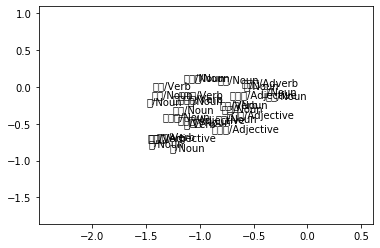

In [39]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()